In [1]:
# 리뷰 정보 클래스 작성하기
import urllib.request
from bs4 import BeautifulSoup

class Review:
  def __init__(self, comment, date, star, good, bad):
    self.comment = comment
    self.date = date
    self.star = star
    self.good = good
    self.bad = bad

  def show(self):
    print("내용: " + self.comment +
          "\n날짜: " + self.date +
          "\n별점: " + self.star +
          "\n좋아요: " + self.good +
          "\n싫어요: " + self.bad)

In [2]:
# 리뷰 정보 크롤링 함수

def crawl(url):
  soup = BeautifulSoup(urllib.request.urlopen(url).read(), "html.parser")
  review_list = []
  title = soup.find('h3', class_='h_movie').find('a').text
  div = soup.find("div", class_="score_result")
  data_list = div.select("ul > li")
  
  for review in data_list:
    star = review.find("div", class_="star_score").text.strip()
    reply = review.find("div", class_="score_reple")
    comment = reply.find("p").text
    date = reply.select("dt > em")[1].text.strip()
    button = review.find("div", class_="btn_area")
    sympathy = button.select("div > a > strong")
    good = sympathy[0].text
    bad = sympathy[1].text
    review_list.append(Review(comment, date, star, good, bad))

  return title, review_list

In [3]:
# 데이터 프레임화

import pandas as pd

def get_summary(review_list):
  star_list = []
  good_list = []
  bad_list = []
  
  for review in review_list:
    star_list.append(int(review.star))
    good_list.append(int(review.good))
    bad_list.append(int(review.bad))
    
  star_series = pd.Series(star_list)
  good_series = pd.Series(good_list)
  bad_series = pd.Series(bad_list)
  
  summary = pd.DataFrame({
      'Star': star_series,
      'Good': good_series,
      'Bad': bad_series,
      'Score': good_series / (good_series + bad_series)
  })
  
  return summary

In [4]:
# 다수의 영화 데이터 시각화

movie_code_list = [136900, 167657, 174321, 184859, 167391]
review_lists = []

for i in movie_code_list:
  title, review_list = crawl("https://movie.naver.com/movie/bi/mi/basic.nhn?code=" + str(i))
  summary = get_summary(review_list)
  print("[ %s ]" % (title))
  print(summary)
  review_lists.append((title, review_list))

[ 어벤져스: 엔드게임 ]
   Star   Good  Bad     Score
0    10  23837  670  0.972661
1    10  15795  443  0.972718
2    10  15396  475  0.970071
3    10  14358  585  0.960851
4    10  11932  437  0.964670
[ 명탐정 피카츄 ]
   Star  Good  Bad     Score
0    10  1974  108  0.948127
1    10   996   86  0.920518
2    10   932   84  0.917323
3     8   962  284  0.772071
4     8   640   44  0.935673
[ 고양이 여행 리포트 ]
   Star  Good  Bad     Score
0    10    78    6  0.928571
1    10    46    4  0.920000
2    10    38    5  0.883721
3    10    34    3  0.918919
4     6    55   25  0.687500
[ 물의 기억 ]
   Star  Good  Bad     Score
0    10    29   12  0.707317
1    10    27   12  0.692308
2    10    24   11  0.685714
3    10    19    7  0.730769
4    10    22   10  0.687500
[ 더 캡틴 ]
   Star  Good  Bad     Score
0     9    90   12  0.882353
1    10    50    7  0.877193
2    10    48    6  0.888889
3     8    43    6  0.877551
4     8    33    0  1.000000


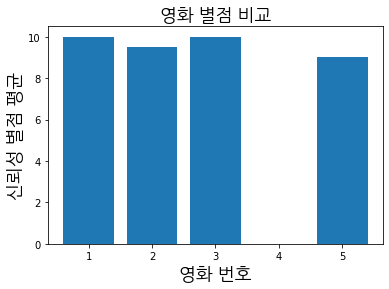

In [18]:
# 다수의 영화 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/Users/kimbyeongmin/Desktop/NanumFont/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

def movie_compare(review_lists):
  count = 1
  x = []
  y = []
  for movie, review_list in review_lists:
    x.append(count)
    summary = get_summary(review_list)
    summary = summary[summary['Score'] > 0.8]
    y.append(summary['Star'].mean())
    count += 1
  plt.bar(x, y)
  plt.title('영화 별점 비교', fontproperties=fontprop)
  plt.xlabel('영화 번호', fontproperties=fontprop)
  plt.ylabel('신뢰성 별점 평균', fontproperties=fontprop)
  plt.show()
  
movie_compare(review_lists)
